Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



C:\Users\bmore\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


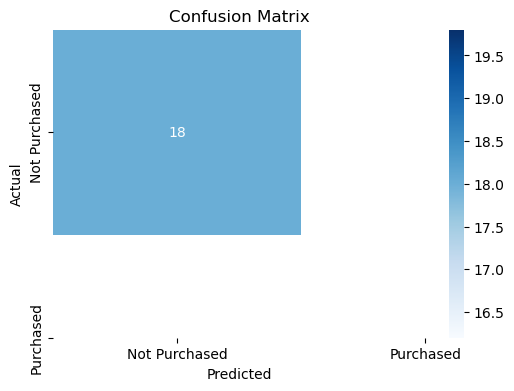

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the cleaned datasets

customers_df = pd.read_csv("cleaned_customers_data.csv")
products_df = pd.read_csv("cleaned_products_data.csv")
transactions_df = pd.read_csv("cleaned_transactions_data.csv")


# Merge datasets

# Aggregate transactions at the customer level
customer_transactions = transactions_df.groupby("Company_ID").agg(
    Total_Spend=("Revenue_per_Transaction", "sum"),
    Total_Transactions=("Transaction_ID", "count"),
    Avg_Spend=("Revenue_per_Transaction", "mean")
).reset_index()

# Merge transactions with customer demographics
customer_data = customers_df.merge(customer_transactions, on="Company_ID", how="left")

# Fill missing values with 0 (for customers with no transactions)
customer_data.fillna(0, inplace=True)


# Define Target Variable

# Create a binary target variable: If the customer made at least one transaction, they are a buyer.
customer_data["Purchased"] = (customer_data["Total_Transactions"] > 0).astype(int)


# Select Features for Training

features = ["Company_Profit", "Total_Spend", "Total_Transactions", "Avg_Spend"]
target = "Purchased"

X = customer_data[features]
y = customer_data[target]

# Standardizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split Data into Training & Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Make Predictions & Evaluate Model

y_pred = rf_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()